In [1]:
from pyrootmemo.fit.fit_xy_powerlaw import PowerlawFitWeibull, PowerlawFitGamma, PowerlawFitGumbel, PowerlawFitUniform
import numpy as np
from pyrootmemo.tools.helpers import units
import matplotlib.pyplot as plt

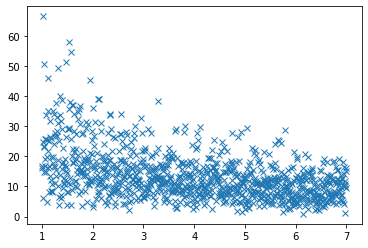

In [2]:
# generate data
rng = np.random.default_rng()
shape = 4.0
x = np.linspace(1, 7, 1000)
random_factor = rng.gamma(shape, scale = 1. / shape, size = len(x))
y = 25 * x**(-0.5) * random_factor
w = rng.uniform(0.8, 1.2, len(x))
# with units - generate
xu = x * units("mm")
yu = y * units("MPa")
# show
plt.plot(x, y, 'x')

In [ ]:
# Uniform
U = PowerlawFitUniform(xu, yu)
print(U.x0)
print(U.y0)
#print(U.x)
#print(U.y)
#print(U.weights)
print(U.multiplier)
print(U.exponent)
print(U.width)
print(U.random(np.array([2, 3, 4]) * units('mm')))
#print(U.density())
#print(U.density(cumulative = True))
print(U.ks_distance())
print(U.loglikelihood(deriv = 0))
print(U.loglikelihood(deriv = 1))
print(U.loglikelihood(deriv = 2))
print(U.covariance())
print(U.covariance(method = 'bootstrap', n = 100))
print(U.prediction_interval(n = 5))
print(U.confidence_interval(n = 5))

1.0
1.0
37.30063426160259
-0.5215274154141666
70.13024458793343
[33.45005320434592 28.093857998914096 30.2474947443986] / millimeter ** 0.521527
0.983148633251675
-3588.0504197975524
485.89155415504456
None
[[ 2.05737534e+01 -3.94085788e-01  3.69355803e+01]
 [-3.94085788e-01  7.86476535e-03 -7.09490859e-01]
 [ 3.69355803e+01 -7.09490859e-01  6.72026078e+01]]
[[ 1.43397046e+01 -2.77061562e-01  2.57127770e+01]
 [-2.77061562e-01  5.78766366e-03 -5.00186274e-01]
 [ 2.57127770e+01 -5.00186274e-01  4.71191571e+01]]
(array([1. , 2.5, 4. , 5.5, 7. ]), array([[ 3.98876808, 70.61250044],
       [ 2.47344445, 43.78697732],
       [ 1.93574433, 34.26816105],
       [ 1.63952992, 29.02432648],
       [ 1.44576261, 25.59409596]]))
(array([1. , 2.5, 4. , 5.5, 7. ]), array([[29.16640749, 45.43486103],
       [21.27872934, 24.98169243],
       [17.20857645, 18.99532892],
       [14.11039346, 16.55346294],
       [11.98677729, 15.05308128]]))


In [4]:
# Gumbel
Gb = PowerlawFitGumbel(xu, yu)
print(Gb.x0)
print(Gb.y0)
print(Gb.multiplier)
print(Gb.exponent)
print(Gb.scale0)
print(Gb.random(np.array([2, 3, 4]) * units('mm')))
#print(Gb.density())
#print(Gb.density(cumulative = True))
print(Gb.ks_distance())
#print(Gb.loglikelihood(deriv = 0))
#print(Gb.loglikelihood(deriv = 1))
#print(Gb.loglikelihood(deriv = 2))
print(Gb.covariance())
print(Gb.covariance(method = 'bootstrap', n = 100))
print(Gb.prediction_interval(n = 5))
print(Gb.confidence_interval(n = 5))

1.0 millimeter
1.0 megapascal
24.803033767979414 megapascal
-0.5010503453711864
9.73733204959944 megapascal
[11.287721006371461 10.993552539536946 12.78527978612277] megapascal
0.9908125061370063


DimensionalityError: Cannot convert from 'millimeter ** 0.50105' ([length] ** 0.50105) to 'dimensionless' (dimensionless)

In [ ]:
# gamma
G = PowerlawFitGamma(xu, yu)
print(G.multiplier)
print(G.exponent)
print(G.shape)
print(G.x0)
print(G.y0)
#print(G.random(np.array([2, 3, 4]) * units('mm')))
#print(G.density())
#print(G.density(cumulative = True))
print(G.ks_distance())
#print(G.loglikelihood(deriv = 0))
#print(G.loglikelihood(deriv = 1))
#print(G.loglikelihood(deriv = 2))
print(G.covariance())
print(G.covariance(method = 'bootstrap', n = 100))
#print(G.prediction_interval(n = 5))
#print(G.confidence_interval(n = 5))



25.215828026894524 megapascal
-0.4868846671360241
4.108315109283399
1.0 millimeter
1.0 megapascal
0.9740620015607371
[[ 1.13647177e+00 -3.06568073e-02  0.00000000e+00]
 [-3.06568073e-02  9.57356371e-04 -0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  3.12498746e-02]]
[[ 1.20920649e+00 -3.22408176e-02  1.56670400e-03]
 [-3.22408176e-02  9.69758320e-04 -4.31081793e-06]
 [ 1.56670400e-03 -4.31081793e-06  2.93755683e-02]]


In [ ]:
# Weibull
P = PowerlawFitWeibull(x, y)
print(P.colinear)
print(P.multiplier)
print(P.exponent)
print(P.shape)
print(P.x0)
print(P.y0)
print(P.random(np.array([2, 3, 4])))
print(P.ks_distance())
print(P.covariance())
print(P.covariance(method = 'bootstrap'))
print(P.confidence_interval())

False
25.16992724478755
-0.4835129453521206
2.1598018395251377
1.0
1.0
[20.69763413  0.81629181 12.60698948]
0.9547796145384844
[[ 1.07563957e+00 -2.89137529e-02  6.33022082e-03]
 [-2.89137529e-02  9.04852570e-04  3.65153075e-06]
 [ 6.33022082e-03  3.65153075e-06  2.61152283e-03]]
[[ 8.19746244e-01 -2.19012680e-02  8.57902841e-04]
 [-2.19012680e-02  6.90200097e-04  4.12242284e-06]
 [ 8.57902841e-04  4.12242284e-06  3.51187105e-03]]
(array([1.  , 1.06, 1.12, 1.18, 1.24, 1.3 , 1.36, 1.42, 1.48, 1.54, 1.6 ,
       1.66, 1.72, 1.78, 1.84, 1.9 , 1.96, 2.02, 2.08, 2.14, 2.2 , 2.26,
       2.32, 2.38, 2.44, 2.5 , 2.56, 2.62, 2.68, 2.74, 2.8 , 2.86, 2.92,
       2.98, 3.04, 3.1 , 3.16, 3.22, 3.28, 3.34, 3.4 , 3.46, 3.52, 3.58,
       3.64, 3.7 , 3.76, 3.82, 3.88, 3.94, 4.  , 4.06, 4.12, 4.18, 4.24,
       4.3 , 4.36, 4.42, 4.48, 4.54, 4.6 , 4.66, 4.72, 4.78, 4.84, 4.9 ,
       4.96, 5.02, 5.08, 5.14, 5.2 , 5.26, 5.32, 5.38, 5.44, 5.5 , 5.56,
       5.62, 5.68, 5.74, 5.8 , 5.86, 5.92, 5.98, 6.0

In [ ]:
# Weibull with units
Pu = PowerlawFitWeibull(xu, yu)
print(Pu.x0)
print(Pu.y0)
print(Pu.colinear)
print(Pu.multiplier)
print(Pu.exponent)
print(Pu.shape)
print(Pu.random(np.array([2, 3, 4]) * units("mm")))
print(Pu.ks_distance())
print(Pu.xrange())
print(Pu.predict())
print(Pu.get_scale(Pu.xrange()))
print(Pu.prediction_interval(level = 0.5))
print(Pu.covariance())
print(Pu.covariance(method = 'bootstrap'))
print(Pu.confidence_interval())


1.0 millimeter
1.0 megapascal
False
25.16992724478755 megapascal
-0.4835129453521206
2.1598018395251377
[14.787754945615266 19.34816358477015 3.2145469750839566] megapascal
0.9547796145384844
[1.0 1.06 1.12 1.18 1.24 1.3 1.3599999999999999 1.42 1.48 1.54 1.6 1.66 1.72 1.78 1.8399999999999999 1.9 1.96 2.02 2.08 2.1399999999999997 2.2 2.26 2.32 2.38 2.44 2.5 2.56 2.62 2.6799999999999997 2.74 2.8 2.86 2.92 2.98 3.04 3.1 3.16 3.2199999999999998 3.28 3.34 3.4 3.46 3.52 3.58 3.6399999999999997 3.6999999999999997 3.76 3.82 3.88 3.94 4.0 4.0600000000000005 4.12 4.18 4.24 4.3 4.359999999999999 4.42 4.48 4.54 4.6 4.66 4.72 4.779999999999999 4.84 4.9 4.96 5.02 5.08 5.14 5.2 5.26 5.32 5.38 5.4399999999999995 5.5 5.56 5.62 5.68 5.74 5.8 5.859999999999999 5.92 5.9799999999999995 6.04 6.1 6.16 6.22 6.279999999999999 6.34 6.3999999999999995 6.46 6.52 6.58 6.64 6.7 6.76 6.819999999999999 6.88 6.9399999999999995 7.0] millimeter
[25.16992724478755 25.09715825613378 25.02503092831641 24.953535845329416 24

c:\Users\gjm36\AppData\Local\miniforge3\envs\rrmm\Lib\site-packages\matplotlib\cbook.py:1398: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
c:\Users\gjm36\AppData\Local\miniforge3\envs\rrmm\Lib\site-packages\numpy\ma\core.py:2414: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  a = np.array(a, copy=None, subok=True)


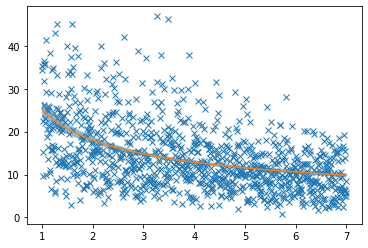

In [ ]:
# test with plot
xf = Pu.xrange()
yf = Pu.predict(xf)
xc,yc = Pu.confidence_interval()
plt.plot(Pu.x, Pu.y, 'x')
plt.plot(xf, yf, '-')
plt.fill_between(xc, *yc.transpose(), alpha = 0.5)